In [4]:
import pandas as pd
df=pd.read_csv('bank-additional-full.csv')
print('Number of records ',len(df))

Number of records  41188


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#get no. of rows with yes or no as output
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

In [8]:
#convert output label to integer and store
df['OUTPUT']=(df.y=='yes').astype('int')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,OUTPUT
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


Fetching numeric data

In [10]:
#fetching numeric data
cols_num = ['campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed','age','euribor3m']

In [11]:
df[cols_num].head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857


In [12]:
#checking for missing values
df[cols_num].isnull().sum()

campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
age               0
euribor3m         0
dtype: int64

In [13]:
#fetching categorical columns
cols_cat=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [14]:
df[cols_cat].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [15]:
#Applying one hot encoding to categorical columns
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first=False,dtype=int)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
#adding the one hot encoded columns to original data frame df
cols_new_cat[list(cols_new_cat.columns)[:20]].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [17]:
df=pd.concat([df,cols_new_cat],axis=1)
cols_all_cat=list(cols_new_cat.columns)
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
print('Total number of features',len(cols_all_cat+cols_num))
print('Numerical Features',len(cols_num))
print('Categorical Features',len(cols_all_cat))

Total number of features 62
Numerical Features 9
Categorical Features 53


In [19]:
#checking missing values
df[cols_num+cols_all_cat].isnull().sum().sort_values(ascending=False)

campaign                0
pdays                   0
previous                0
emp.var.rate            0
cons.price.idx          0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 62, dtype: int64

In [20]:
#New dataframe with columns of interest
cols_input=cols_num+cols_all_cat
df_data=df[cols_input+['OUTPUT']]

In [21]:
cols_input

['campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'age',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [22]:
df_data.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857,0,...,0,0,1,0,0,0,0,1,0,0
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857,0,...,0,0,1,0,0,0,0,1,0,0
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857,1,...,0,0,1,0,0,0,0,1,0,0
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0


In [23]:
#shuffle the samples
df_data=df_data.sample(n=len(df_data),random_state=42)
df_data=df_data.reset_index(drop=True)

In [25]:
#30% of the validation(15%) and test(15%) samples
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size:%.3f'%(len(df_valid_test)/len(df_data)))

Split size:0.300


In [26]:
#split into test and validation samples by 50% which makes 15% test and 15%validation
df_test=df_valid_test.sample(frac=0.5,random_state=42)
df_valid=df_valid_test.drop(df_test.index)

In [29]:
df_test.shape

(6178, 63)

In [30]:
df_valid.shape

(6178, 63)

In [31]:
df_test.head(1)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT
10174,7,999,0,1.4,93.444,-36.1,5228.1,29,4.963,1,...,0,1,0,0,0,0,0,1,0,0


In [32]:
df_valid.head(1)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT
3169,3,999,0,-1.8,93.075,-47.1,5099.1,60,1.405,1,...,0,1,0,0,0,0,0,1,0,0


In [33]:
#the remaining data is for training samples'
df_train_all=df_data.drop(df_valid_test.index)

In [34]:
#calculating prevalence of positive class that is class = 1
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

#check prevalence of positive class in each of the samples
print('Test prevalence(n=%d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT.values)))
print('Valid prevalence(n=%d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT.values)))
print('Train prevalence(n=%d):%.3f'%(len(df_test),calc_prevalence(df_train_all.OUTPUT.values)))

Test prevalence(n=6178):0.114
Valid prevalence(n=6178):0.113
Train prevalence(n=6178):0.112


In [35]:
#creating a balance will allow 50%of samples to be both positive and negative yielding better prediction and reduced overfitting.
rows_pos=df_train_all.OUTPUT==1
df_train_pos=df_train_all.loc[rows_pos]
df_train_neg=df_train_all.loc[~rows_pos]

#merge the balanced data
df_train=pd.concat([df_train_pos,df_train_neg.sample(n=len(df_train_pos),random_state=42)],axis=0)
#shuffle the order of training samples
df_train=df_train.sample(n=len(df_train),random_state=42).reset_index(drop=True)
print('New Train prevalence(n=%d):%.3f'%(len(df_train),calc_prevalence(df_train.OUTPUT.values)))

New Train prevalence(n=6472):0.500


In [36]:
# split the validation into positive and negative
rows_pos = df_valid.OUTPUT == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

# merge the balanced data
df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

# shuffle the order of validation samples 
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop = True)

print('New Valid prevalence(n = %d):%.3f'%(len(df_valid), calc_prevalence(df_train.OUTPUT.values)))

New Valid prevalence(n = 1398):0.500


In [37]:
# split the test into positive and negative
rows_pos = df_test.OUTPUT == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

# merge the balanced data
df_test = pd.concat([df_test_pos, df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

# shuffle the order of test samples 
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop = True)

print('New Test prevalence(n = %d):%.3f'%(len(df_test), calc_prevalence(df_train.OUTPUT.values)))

New Test prevalence(n = 1410):0.500


In [87]:
#saving dataframes into csv files
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [38]:
#filling missing values with mean values
def fill_missing(df,df_mean,col2use):
    #check columns are present
    for c in col2use:
        assert c in df.columns,c+'not in df'
        assert c in df_mean.col.values,c+'not in df'
    #replace mean
    for c in col2use:
        mean_value=df_mean.loc[df_mean.col==c,'mean_val'].values[0]
        df[c]=df[c].fillna(mean_value)
    return df

In [56]:
#mean value from training data
df_mean=df_train_all[cols_input].mean(axis=0)
df_mean.to_csv('df_mean.csv',index=True)
df_mean

campaign                  2.552442
pdays                   962.352456
previous                  0.173037
emp.var.rate              0.078278
cons.price.idx           93.574366
                           ...    
day_of_week_tue           0.196206
day_of_week_wed           0.196865
poutcome_failure          0.102872
poutcome_nonexistent      0.863589
poutcome_success          0.033539
Length: 62, dtype: float64

In [58]:
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in=df_mean_in.iloc[1:]
df_mean_in.head()

,col,mean_val
1,campaign,2.552442
2,pdays,962.352456
3,previous,0.173037
4,emp.var.rate,0.078278
5,cons.price.idx,93.574366


In [59]:
df_train_all = fill_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_missing(df_train, df_mean_in, cols_input)
df_valid = fill_missing(df_valid, df_mean_in, cols_input)

In [60]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT'].values
y_valid = df_valid['OUTPUT'].values

In [61]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [62]:
#transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [63]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
   
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('f1:%.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1

In [64]:
thresh = 0.5

In [66]:
#KNN Machine learning algorithm on train and valid datasets
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(n_neighbors=100)

In [67]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity, knn_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity, knn_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.797
accuracy:0.734
recall:0.604
precision:0.817
specificity:0.858
prevalence:0.500
f1:0.694
 
Validation:
AUC:0.779
accuracy:0.741
recall:0.601
precision:0.835
specificity:0.878
prevalence:0.500
f1:0.699
 


In [68]:
#logistic regression machine learning algorithm
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [69]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity, lr_train_f1= print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity, lr_valid_f1= print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.797
accuracy:0.744
recall:0.633
precision:0.814
specificity:0.856
prevalence:0.500
f1:0.712
 
Validation:
AUC:0.798
accuracy:0.747
recall:0.632
precision:0.822
specificity:0.863
prevalence:0.500
f1:0.715
 


In [71]:
#Gradient descent machine learning algorithm
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log_loss',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=42)

In [72]:
#Stochastic Gradient Descent Algorithm
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity, sgdc_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity, sgdc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
AUC:0.792
accuracy:0.737
recall:0.646
precision:0.789
specificity:0.827
prevalence:0.500
f1:0.710
 
Validation:
AUC:0.800
accuracy:0.749
recall:0.648
precision:0.812
specificity:0.850
prevalence:0.500
f1:0.721
 


In [73]:
#Naive Bayes Machine learning algorithm
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB()

In [74]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity, nb_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity, nb_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.771
accuracy:0.693
recall:0.492
precision:0.822
specificity:0.893
prevalence:0.500
f1:0.615
 
Validation:
AUC:0.780
accuracy:0.702
recall:0.496
precision:0.844
specificity:0.908
prevalence:0.500
f1:0.625
 


In [75]:
#Decision Tree Classifier machine learning algorithm
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [76]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity, tree_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity, tree_valid_f1 = print_report(y_valid,y_valid_preds, thresh)



Decision Tree
Training:
AUC:0.864
accuracy:0.784
recall:0.668
precision:0.871
specificity:0.899
prevalence:0.500
f1:0.756
 
Validation:
AUC:0.748
accuracy:0.720
recall:0.611
precision:0.781
specificity:0.823
prevalence:0.500
f1:0.685
 


In [77]:
#Random Forest Machine learning algorithm
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [78]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity, rf_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity, rf_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.813
accuracy:0.750
recall:0.632
precision:0.828
specificity:0.869
prevalence:0.500
f1:0.717
 
Validation:
AUC:0.795
accuracy:0.755
recall:0.642
precision:0.828
specificity:0.867
prevalence:0.500
f1:0.724
 


In [79]:
#Gradient Boosting Machine leraning Algorithm
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [80]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity, gbc_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')

gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity, gbc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)



Gradient Boosting Classifier
Training:
AUC:0.900
accuracy:0.820
recall:0.766
precision:0.860
specificity:0.875
prevalence:0.500
f1:0.810
 
Validation:
AUC:0.777
accuracy:0.721
recall:0.684
precision:0.739
specificity:0.758
prevalence:0.500
f1:0.710
 


In [81]:
#Analyzing the results of the baseline models
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,],
                          'f1':[knn_train_f1, knn_valid_f1,lr_train_f1,lr_valid_f1,sgdc_train_f1,sgdc_valid_f1,nb_train_f1,nb_valid_f1,tree_train_f1,tree_valid_f1,rf_train_f1,rf_valid_f1,gbc_train_f1,gbc_valid_f1,],
                          })

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

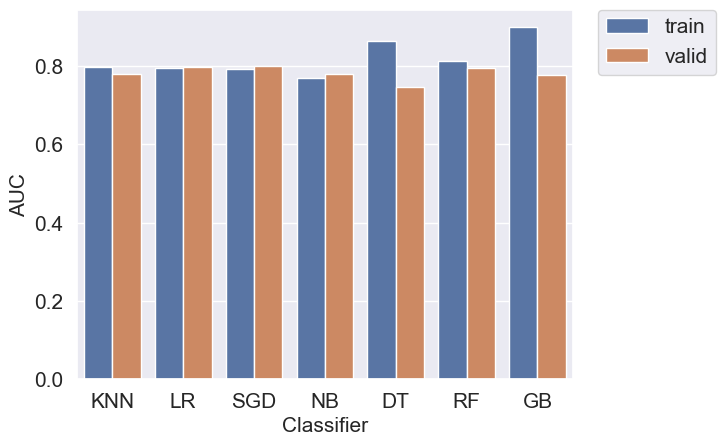

In [83]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

In [84]:
#The gradient boosting algorithm has higher AUC on training dataset and is considered the best model.
#The AUC of GD is 0.9 for a threshold of 0.5. 
#It signifies that it is more than just a random guess towards a positive class and it is close to 1.

In [85]:
#Model Evaluation using test data performed with the best model - Gradient Boosting.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [89]:
#loading the saved datasets
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])

In [90]:
df_train.shape

(6472, 63)

In [92]:
#fill missing data
df_train = fill_missing(df_train, df_mean_in, cols_input)
df_valid = fill_missing(df_valid, df_mean_in, cols_input)
df_test = fill_missing(df_test, df_mean_in, cols_input)


In [93]:
#create X and Y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT'].values
y_valid = df_valid['OUTPUT'].values
y_test = df_test['OUTPUT'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [95]:
#Prediction possibilities
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]
y_test_preds = gbc.predict_proba(X_test_tf)[:,1]

In [97]:
#Evaluating performances
thresh = .5 

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity, train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity, valid_f1 = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity, test_f1 = print_report(y_test,y_test_preds, thresh)



Training:
AUC:0.900
accuracy:0.820
recall:0.766
precision:0.860
specificity:0.875
prevalence:0.500
f1:0.810
 
Validation:
AUC:0.777
accuracy:0.721
recall:0.684
precision:0.739
specificity:0.758
prevalence:0.500
f1:0.710
 
Test:
AUC:0.752
accuracy:0.711
recall:0.644
precision:0.744
specificity:0.779
prevalence:0.500
f1:0.690
 


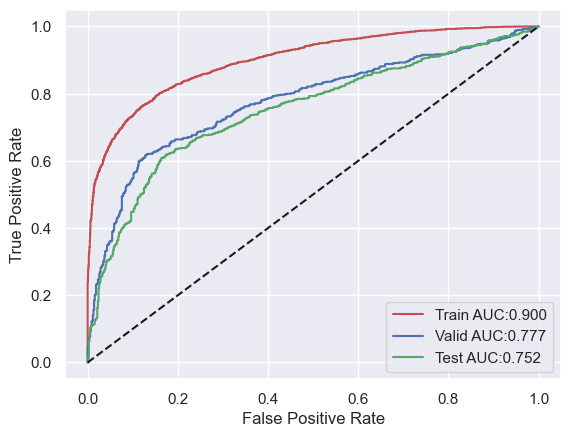

In [98]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
#Our data shows that the results for the training, validation and testing data sets are skewed towards the true positive rate and above the treshold of 0.5 which is great! 
#The test AUC of 0.752 means that the gradient boosting model has a performance of 75.2%.
#Conclusion :  
#Through this project, we created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit.
#The best model was gradient boosting classifier. The model's performance is 75.2%.